In [53]:
import numpy as np
import pandas as pd
import sklearn
from microlearn.offloader import Offload
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [54]:
dataset = pd.read_csv('dataset2.csv', sep=',',header=0)
dataset

,Suhu,Kelembaban,Curah Hujan,Hasil Prediksi
0,24.5,80,0.0,"ulat_daun=rendah,ulat_krop=rendah,busuk_hitam=..."
1,24.8,84,45.5,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
2,24.8,83,9.8,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
3,24.3,81,0.6,"ulat_daun=rendah,ulat_krop=rendah,busuk_hitam=..."
4,24.1,86,23.0,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
5,23.9,85,2.7,"ulat_daun=rendah,ulat_krop=rendah,busuk_hitam=..."
6,23.2,86,12.2,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
7,23.5,84,5.2,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."
8,23.5,85,0.8,"ulat_daun=rendah,ulat_krop=rendah,busuk_hitam=..."
9,22.8,91,27.2,"ulat_daun=tinggi,ulat_krop=tinggi,busuk_hitam=..."


In [55]:
dataset.columns = dataset.columns.to_series().apply(lambda x: x.strip())

In [56]:
X = dataset.loc[:, ['Suhu','Kelembaban', 'Curah Hujan']].to_numpy()
Y = dataset.loc[:, ['Hasil Prediksi']].to_numpy()
Y = Y.flatten()

In [57]:
print(X)

[[24.5 80.   0. ]
 [24.8 84.  45.5]
 [24.8 83.   9.8]
 [24.3 81.   0.6]
 [24.1 86.  23. ]
 [23.9 85.   2.7]
 [23.2 86.  12.2]
 [23.5 84.   5.2]
 [23.5 85.   0.8]
 [22.8 91.  27.2]
 [22.9 86.   8. ]
 [24.3 80.   4.2]
 [24.3 81.   3.7]
 [25.2 77.   0. ]]


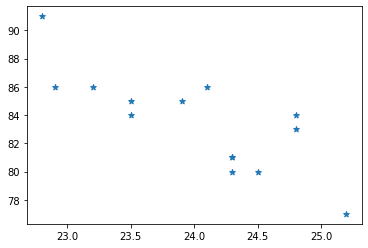

In [58]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker="*");

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
print(X)

[[24.5  1.   0. ]
 [24.8  4.  45.5]
 [24.8  3.   9.8]
 [24.3  2.   0.6]
 [24.1  6.  23. ]
 [23.9  5.   2.7]
 [23.2  6.  12.2]
 [23.5  4.   5.2]
 [23.5  5.   0.8]
 [22.8  7.  27.2]
 [22.9  6.   8. ]
 [24.3  1.   4.2]
 [24.3  2.   3.7]
 [25.2  0.   0. ]]


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [63]:
print(X_train)

[[24.3  1.   4.2]
 [24.8  3.   9.8]
 [25.2  0.   0. ]
 [22.8  7.  27.2]
 [24.8  4.  45.5]
 [23.5  4.   5.2]
 [22.9  6.   8. ]
 [24.3  2.   0.6]
 [24.5  1.   0. ]
 [23.9  5.   2.7]
 [24.3  2.   3.7]]


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

In [66]:
X_train = sc.fit_transform(X_train)

In [67]:
X_test = sc.fit_transform(X_test)

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [70]:
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score)

In [71]:
y_pred = classifier.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6666666666666666
F1 Score: 0.8000000000000002


In [73]:
off = Offload(classifier)
off.export_to_arduino('D:\qda_offload6.ino')